In [28]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Training and splitting Data

In [22]:
Data = pd.read_csv(r"C:\Users\Swami\Downloads\housing.csv")
Data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
median_income = np.log( Data['median_income']) # USing log income # TARGET
features = Data.drop('ocean_proximity', axis=1) #1 represents column
#removing this median income column for features

X_train, X_test, y_train, y_test = train_test_split(features, median_income, test_size= 0.2, random_state=10)
# shuffle and split the data, shuffle depends on random_state.

# Multivariable regression by using log income for fit regr line

In [24]:
regr = LinearRegression
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index= X_train.columns, columns=['coef']) 
# Here we get co-efficients of all features in a dataframe, 
#signs of co-eff is important. 

# to print test and target datasets R-squared values
print('Trainind data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

AttributeError: 'DataFrame' object has no attribute '_validate_params'

# Data Transformations

In [ ]:
Data["median_income"].skew()

1.6466567021344465

In [ ]:
# transform the data to reduce skew core
y_log = np.log(Data['median_income'])
y_log.tail()

20635    0.444878
20636    0.938756
20637    0.530628
20638    0.624440
20639    0.870707
Name: median_income, dtype: float64

In [ ]:
y_log.skew() # now score go reduced after log conversion

-0.14608181157738848

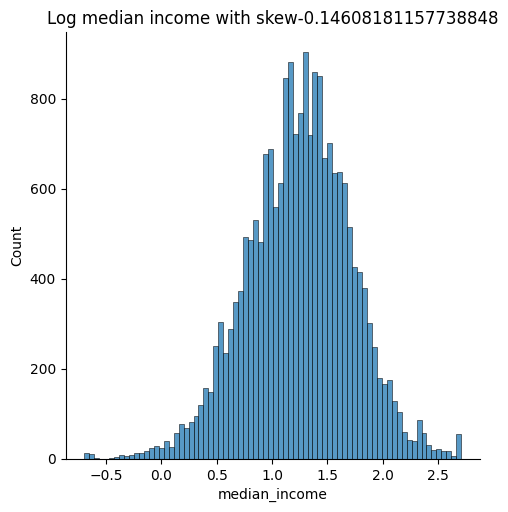

In [ ]:
sns.displot(y_log)
plt.title(f'Log median income with skew{y_log.skew()}')
plt.show()

In [ ]:
transformed_data =  features
transformed_data['Log_income'] = y_log # adding this log column data
sns.lmplot(x='median_income', y='Log_income', data=transformed_data,  
             scatter_kws={'alpha': 0.6}, line_kws={'color ':'cyan'}) # plot the linear fit data
plt.show()

# Evaluating Coefficients & p-values

In [ ]:
x_include_const = sm.add_constant(X_train) # features are given as constant

model = sm.OLS(y_train, x_include_const) # in Ordinary least square 
#we are training linear regr model
results = model.fit()

results.params # shows coefficient values
results.pvalues

pd.DataFrame({'coef' : results.params, 'p-values': round(results.pvalues, 3) })
#dispaly coef and pvalues in a dataframe

# Test for Multicollinearity
$$  TAX = \alpha _0 + \alpha_1 RM + \alpha_2 NOX +  ... +\alpha_ {12} LSTAT  $$

$$ VIF _{TAX} = \frac {1} / {(1- R_{TAX}^2)} $$

In [ ]:
# variance_inflation_factor( exog = x_include_const, exog_idx =  )
len(x_include_const.columns) # To get number of columns.
x_include_const.shape[1] # num of col and row

vif = [variance_inflation_factor (exog = x_include_const.values, exog_idx = 1)
        for i in range(x_include_const.shape[1])]
pd.DataFrame( {'co-ef_name': x_include_const.columns, 'vif': np.around(vif, 2)})

# Model Simplification & BIC

In [ ]:
# original model with log prices and all features
x_include_const = sm.add_constant(X_train) # features are given as constant

model = sm.OLS(y_train, x_include_const) # in Ordinary least square 
#we are training linear regr model
results = model.fit()

org_coef = pd.DataFrame({'coef' : results.params, 'p-values': round(results.pvalues, 3) })
# print BIC and R-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

In [ ]:
# Reduced model , excluding the feature
x_include_const = sm.add_constant(X_train) # features are given as constant
x_include_const = x_include_const.drop((['median_income']), axis =1)
model = sm.OLS(y_train, x_include_const) # in Ordinary least square 
#we are training linear regr model
results = model.fit()

reduced_model_coef = pd.DataFrame({'coef' : results.params, 'p-values': round(results.pvalues, 3) })
# print BIC and R-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)